In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats

In [12]:
train = pd.read_csv('tokenized_train_data.csv')
test = pd.read_csv('tokenized_test_data.csv')
master = pd.concat([train, test])

In [16]:
test_auc_scores = []
for i in range(1000):
    print(i, 'iteration')
    train, test = train_test_split(master, test_size=0.25, random_state=42)
    vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 200)
    # get X train 2d array of train features
    X_train = vectorizer.fit_transform(train['tokenized_lyrics'].values).toarray()
    vocab = vectorizer.get_feature_names()
    # Train model
    model = LogisticRegression(max_iter = 10000).fit(X_train, train['lr_valence'].values)
    
    # create vectorizer for test data
    test_vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 200, vocabulary= vocab)
    # get X test 2d array of train features
    X_test = test_vectorizer.fit_transform(test['tokenized_lyrics'].values).toarray()
    # get test y predictions
    test_pred = model.predict(X_test)
    # get train auc scores
    test_auc = roc_auc_score(test['lr_valence'].values, test_pred)
    test_auc_scores.append(test_auc)

0 iteration
1 iteration
2 iteration
3 iteration
4 iteration
5 iteration
6 iteration
7 iteration
8 iteration
9 iteration
10 iteration
11 iteration
12 iteration
13 iteration
14 iteration
15 iteration
16 iteration
17 iteration
18 iteration
19 iteration
20 iteration
21 iteration
22 iteration
23 iteration
24 iteration
25 iteration
26 iteration
27 iteration
28 iteration
29 iteration
30 iteration
31 iteration
32 iteration
33 iteration
34 iteration
35 iteration
36 iteration
37 iteration
38 iteration
39 iteration
40 iteration
41 iteration
42 iteration
43 iteration
44 iteration
45 iteration
46 iteration
47 iteration
48 iteration
49 iteration
50 iteration
51 iteration
52 iteration
53 iteration
54 iteration
55 iteration
56 iteration
57 iteration
58 iteration
59 iteration
60 iteration
61 iteration
62 iteration
63 iteration
64 iteration
65 iteration
66 iteration
67 iteration
68 iteration
69 iteration
70 iteration
71 iteration
72 iteration
73 iteration
74 iteration
75 iteration
76 iteration
77 iterat

594 iteration
595 iteration
596 iteration
597 iteration
598 iteration
599 iteration
600 iteration
601 iteration
602 iteration
603 iteration
604 iteration
605 iteration
606 iteration
607 iteration
608 iteration
609 iteration
610 iteration
611 iteration
612 iteration
613 iteration
614 iteration
615 iteration
616 iteration
617 iteration
618 iteration
619 iteration
620 iteration
621 iteration
622 iteration
623 iteration
624 iteration
625 iteration
626 iteration
627 iteration
628 iteration
629 iteration
630 iteration
631 iteration
632 iteration
633 iteration
634 iteration
635 iteration
636 iteration
637 iteration
638 iteration
639 iteration
640 iteration
641 iteration
642 iteration
643 iteration
644 iteration
645 iteration
646 iteration
647 iteration
648 iteration
649 iteration
650 iteration
651 iteration
652 iteration
653 iteration
654 iteration
655 iteration
656 iteration
657 iteration
658 iteration
659 iteration
660 iteration
661 iteration
662 iteration
663 iteration
664 iteration
665 it

In [17]:
print(test_auc_scores)

[0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766, 0.5612889685961766,

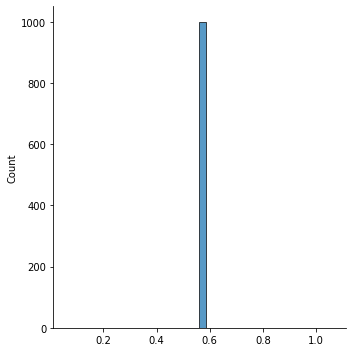

In [28]:
valence_hist = sns.displot(test_auc_scores, bins=40)

In [40]:
tt, tpval = stats.ttest_1samp(test_auc_scores,0.5)

In [41]:
tpval

0.0